# 📊 NumPy Statistics for Data Analysts
This notebook is designed to help data analysts master descriptive and inferential statistics using NumPy and SciPy.

In [105]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode


## 🔹 Basic Descriptive Statistics

In [106]:

# Sales data for 10 days
sales = np.array([120, 150, 130, 170, 160, 180, 200, 220, 190, 210])

mean = np.mean(sales)
median = np.median(sales)
min_val = np.min(sales)
max_val = np.max(sales)
range_val = np.ptp(sales)
std_dev = np.std(sales)
variance = np.var(sales)

print("Mean:", mean)
print("Median:", median)
print("Min:", min_val)
print("Max:", max_val)
print("Range:", range_val)
print("Standard Deviation:", std_dev)
print("Variance:", variance)


Mean: 173.0
Median: 175.0
Min: 120
Max: 220
Range: 100
Standard Deviation: 31.63858403911275
Variance: 1001.0


## 🔹 Quartile Analysis

In [ ]:

q25 = np.percentile(sales, 25)
q50 = np.percentile(sales, 50)
q75 = np.percentile(sales, 75)

print("Q1 (25th percentile):", q25)
print("Q2 (Median):", q50)
print("Q3 (75th percentile):", q75)


Q1 (25th percentile): 152.5
Q2 (Median): 175.0
Q3 (75th percentile): 197.5


## 🔹 Outlier Detection using IQR

In [108]:

iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

outliers = sales[(sales < lower_bound) | (sales > upper_bound)]

print("IQR:", iqr)
print("Outliers:", outliers)


IQR: 45.0
Outliers: []


## What the Code Does:

`iqr = q75 - q25`

Meaning:

* iqr is the Interquartile Range.

* It's the range between the third quartile (Q3 or 75th percentile) and the first quartile (Q1 or 25th percentile).

* It measures the spread of the middle 50% of your data.

* It helps you understand where most of your values lie.

`lower_bound = q25 - 1.5 * iqr`

`upper_bound = q75 + 1.5 * iqr`

Meaning:

* These are thresholds to detect outliers.

* Lower bound = anything smaller than this is considered too low (potential outlier).

* Upper bound = anything bigger than this is considered too high (potential outlier).

* The 1.5 * IQR is a common multiplier in statistics (used in boxplots too).



`outliers = sales[(sales < lower_bound) | (sales > upper_bound)]`

Meaning:

* This filters the sales array to include only the values less than the lower bound or greater than the upper bound.

* These are considered outliers.

`print("IQR:", iqr)`

`print("Outliers:", outliers)`

Output:

* You see the computed Interquartile Range.

* You also see the values from sales that are unusually far from the majority — i.e., outliers.

### Another Real-Life Example

Let’s say you have this data of daily sales:

In [109]:
sales = [100, 105, 110, 115, 120, 125, 500]

* Q1 = 105

* Q3 = 125

* IQR = 125 - 105 = 20

* Lower bound = 105 - 1.5*20 = 75

* Upper bound = 125 + 1.5*20 = 155

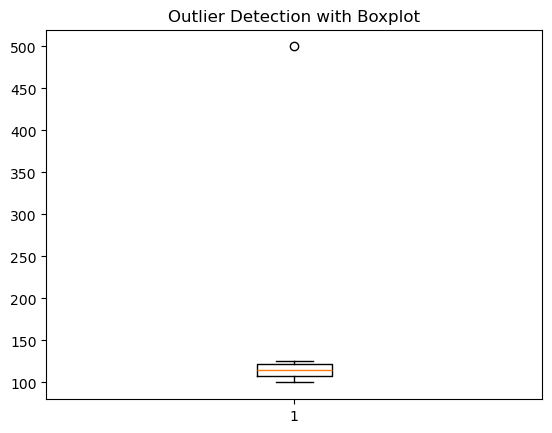

In [110]:
import matplotlib.pyplot as plt
plt.boxplot(sales)
plt.title("Outlier Detection with Boxplot")
plt.show()

So any value < 75 or > 155 is an outlier.

* In this case, 500 would be detected as an outlier.

## 🔹 Skewness and Kurtosis

Skewness: 2.026735446473709
Kurtosis: 2.1351189373433686


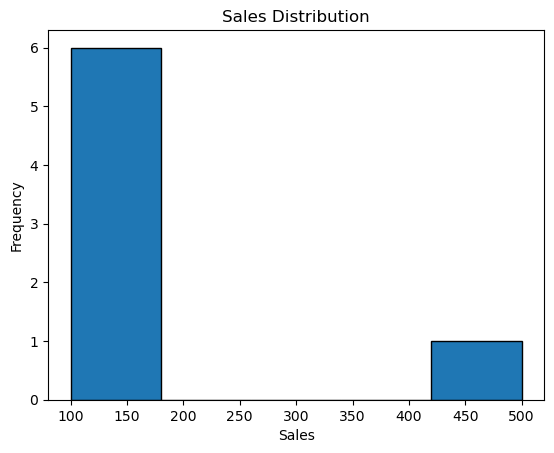

In [111]:

print("Skewness:", skew(sales))
print("Kurtosis:", kurtosis(sales))

# Histogram
plt.hist(sales, bins=5, edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


## 🔹 Cumulative Sum

In [112]:

cumulative_sales = np.cumsum(sales)
print("Cumulative Sales:", cumulative_sales)


Cumulative Sales: [ 100  205  315  430  550  675 1175]


## 🔹 Real-World Scenario: Anomaly Detection

In [113]:

engagement = np.array([30, 45, 50, 55, 60, 120, 65, 70, 75, 80, 90, 85, 100, 95, 300])


mean = np.mean(engagement)
std_dev = np.std(engagement)

threshold = mean + 2 * std_dev
anomalies = engagement[engagement > threshold]

print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Anomalies:", anomalies)


Mean: 88.0
Standard Deviation: 60.986337267730164
Anomalies: [300]


You're looking at a practical anomaly detection technique using standard deviation, which is often used to flag unusually high values in a dataset. 

Let’s break it all down step by step and explain what’s happening, why it works, and how to teach it effectively.

### What the Code Does

`engagement = np.array([30, 45, 50, 55, 60, 120, 65, 70, 75, 80, 90, 85, 100, 95, 300])`

This is your dataset — e.g., user engagement times on a website in minutes.

You have a NumPy array of engagement values (e.g., daily user engagement counts). One of them (300) seems suspiciously high just by looking at it.

`mean = np.mean(engagement)`

Calculates the mean (average) of the engagement values.

Why it's useful: The mean tells you the central tendency — the expected typical value.

mean: the average value of engagement (the center of the data).

`std_dev = np.std(engagement)`

Computes the standard deviation, which measures how much the data varies (spreads out) from the mean.

std_dev: standard deviation — how much the values vary from the mean.

* High std dev = data is very spread out.

* Low std dev = data is tightly packed around the mean.

`threshold = mean + 2 * std_dev`

Sets a cutoff threshold: any value that is more than 2 standard deviations above the mean is considered an anomaly.

This is based on the Empirical Rule:

* ~95% of values fall within ±2 standard deviations in a normal distribution.

* Anything beyond this is statistically rare.


This sets a threshold to flag anomalies.

* The logic here is: any value more than 2 standard deviations above the mean is unusually high — likely an anomaly or outlier.

* This method assumes data is roughly normally distributed.

This is a commonly used technique in real-world anomaly detection for performance metrics, fraud detection, etc.

`anomalies = engagement[engagement > threshold]`

Filters the dataset to find only those values greater than the threshold.

These are anomalies — unusually high engagement values.

Meaning:

* This line filters the data.

* It returns only those engagement values that exceed the anomaly threshold.

`print("Mean:", mean)`

`print("Standard Deviation:", std_dev)`

`print("Anomalies:", anomalies)`

Prints out:

* The central average

* How much the values vary

* And which values are too far from normal behavior

NOTE => The anomalies lists any unusually high values.

### Example Breakdown (with the given data):

Let’s compute it in words:

Engagement data has a high value of 300, which seems suspicious.

When we calculate:

* mean ≈ 88.0

* std_dev ≈ 60.99

* threshold = 88.0 + 2*60.99 ≈ 209.98

So anything > 209.98 is considered an anomaly.

* Only value > 209.98 = 300 ➜ 🚨 Detected as an anomaly

| Term                 | Explanation                                          |
| -------------------- | ---------------------------------------------------- |
| `mean`               | Central average of all engagement numbers            |
| `std_dev`            | Spread (how far values vary from the mean)           |
| `mean + 2 * std_dev` | Threshold to flag **very high** values               |
| `anomalies = ...`    | Extracts suspicious values that are far above normal |


Why This Is Important for Data Analysts

* Helps identify unusual behavior in logs, transactions, engagement, etc.

* Often used in fraud detection, user behavior analysis, sensor errors, etc.

* Easy to implement and fast to compute with NumPy

### Let's use a visual aid to drive the point home:

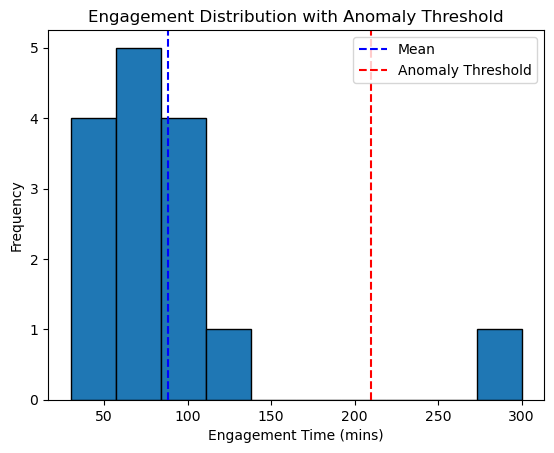

In [ ]:
import matplotlib.pyplot as plt

plt.hist(engagement, bins=10, edgecolor='black')
plt.axvline(mean, color='blue', linestyle='dashed', label='Mean')
plt.axvline(threshold, color='red', linestyle='dashed', label='Anomaly Threshold')
plt.title("Engagement Distribution with Anomaly Threshold")
plt.xlabel("Engagement Time (mins)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


* This above visualization will clearly show the mean and where anomalies begin — excellent for helping the team see what the code is doing.

## 🔹 Practice: Daily Visitors Analysis
Given data for daily website visitors, calculate basic stats and interpret the distribution.

Mean: 217.46666666666667
Median: 195.0
Standard Deviation: 97.39190018796339
Skewness: 1.0691956907411726
Kurtosis: 0.35877648852794186


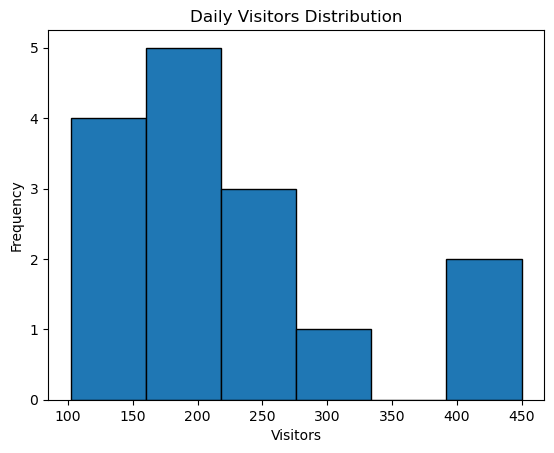

In [115]:

visitors = np.array([102, 110, 120, 140, 160, 180, 190, 195, 205, 220, 240, 250, 300, 400, 450])

print("Mean:", np.mean(visitors))
print("Median:", np.median(visitors))
print("Standard Deviation:", np.std(visitors))
print("Skewness:", skew(visitors))
print("Kurtosis:", kurtosis(visitors))

plt.hist(visitors, bins=6, edgecolor='black')
plt.title('Daily Visitors Distribution')
plt.xlabel('Visitors')
plt.ylabel('Frequency')
plt.show()


## 🔹 Practice: Income Data Stats
You’re analyzing income data of a sample population. Calculate all relevant statistics and identify possible anomalies.

In [116]:

income = np.array([25000, 27000, 29000, 31000, 33000, 35000, 37000, 40000, 45000, 50000, 60000, 100000])

print("Mean:", np.mean(income))
print("Median:", np.median(income))
print("Standard Deviation:", np.std(income))
print("Skewness:", skew(income))
print("Kurtosis:", kurtosis(income))

# IQR Method for outlier detection
q1 = np.percentile(income, 25)
q3 = np.percentile(income, 75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = income[(income < lower) | (income > upper)]
print("Outliers:", outliers)


Mean: 42666.666666666664
Median: 36000.0
Standard Deviation: 19829.831623647795
Skewness: 1.9132244506818932
Kurtosis: 2.9944582311770676
Outliers: [100000]
